In [2]:
import afm_csv_analysis as afm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px



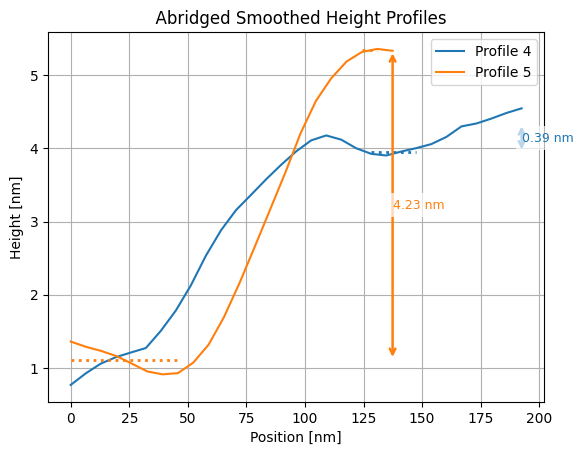

In [10]:
good_file = r'C:\Users\poeda\OneDrive\Desktop\Documents\Luo Group\AFM Images\CrsBr MTJ Project\CrSBr MTJ #3.026 heights.csv'
good = afm.afmData(good_file).zero_minimums().select_profiles([4,5]).smoothing_data(10)
good.graph(show_steps=True)


In [5]:
good_file = r'C:\Users\poeda\OneDrive\Desktop\Documents\Luo Group\AFM Images\CrsBr MTJ Project\CrSBr MTJ #3.014 heights.csv'
good = afm.afmData(good_file).zero_minimums().smoothing_data(3)
dict = good.find_steps()
print(dict)
height = good.find_height()
print(height)

{'Profile 1': {'step_height': 5.5372472222222365e-09, 'x_step': 1.1346713e-07, 'plateau1_mean': 1.219394444444749e-10, 'plateau2_mean': 5.659186666666711e-09, 'plateau1_range': (0.0, 7.8253193e-09), 'plateau2_range': (1.0955447e-07, 1.0955447e-07)}, 'Profile 2': {'step_height': -3.8542833333334533e-10, 'x_step': 1.0972969e-07, 'plateau1_mean': 4.694503333333342e-09, 'plateau2_mean': 4.3090749999999965e-09, 'plateau1_range': (5.878376e-08, 7.445943e-08), 'plateau2_range': (8.6216182e-08, 9.0135099e-08)}, 'Profile 3': {'step_height': -2.5529533333331186e-10, 'x_step': 1.2066027e-07, 'plateau1_mean': 4.822898666666645e-09, 'plateau2_mean': 4.567603333333333e-09, 'plateau1_range': (9.3414401e-08, 1.0898347e-07), 'plateau2_range': (1.16768e-07, 1.16768e-07)}, 'Profile 4': {'step_height': -8.597600000000458e-10, 'x_step': 1.1532455e-07, 'plateau1_mean': 6.463621666666653e-09, 'plateau2_mean': 5.603861666666607e-09, 'plateau1_range': (5.965063e-08, 7.9534173e-08), 'plateau2_range': (9.9417716

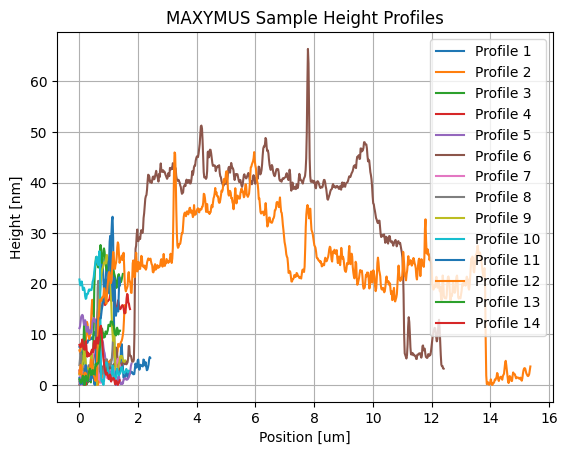

TypeError: argument of type 'NoneType' is not iterable

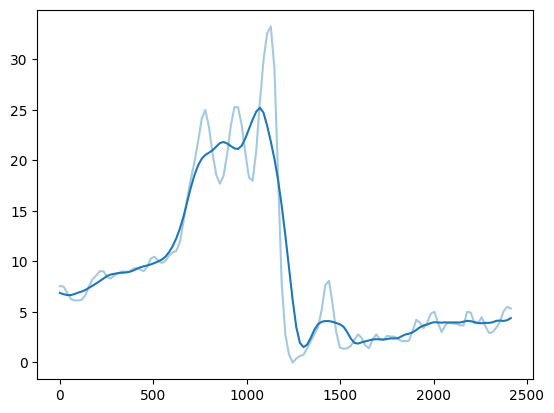

In [3]:
maxymus_scan_4 = r'C:\Users\poeda\OneDrive\Desktop\Documents\Luo Group\AFM Images\CrsBr MTJ Project\MAXYMUS #4.013 height scans.csv'
maxymus = afm.afmData(maxymus_scan_4, "MAXYMUS Sample").zero_minimums()
electrodes = maxymus.select_profiles([1,2], "Electrodes")
electrodes_smooth = electrodes.smoothing_data(10)
hBN = maxymus.select_profiles([3,10,11], "hBN")
hBN_smooth = hBN.smoothing_data(10)
FGT = maxymus.select_profiles([4,5,13,14], "FGT")
FGT_smooth = FGT.smoothing_data(10)
maxymus.graph()
electrodes_smooth.graph(raw=electrodes, show_steps=True)
hBN_smooth.graph(raw=hBN, show_steps=True)
FGT_smooth.graph(raw=FGT, show_steps=True)

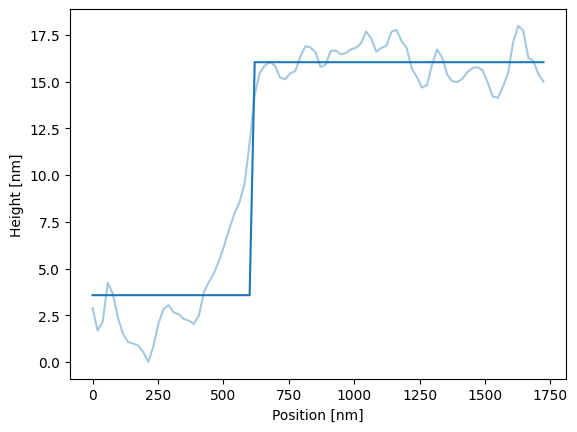

In [3]:
FGT_threshold = FGT.threshold_averaging(2.5e-9).select_profiles([4])
FGT_threshold.graph(raw=FGT,grid=False,title=False,legend=False)


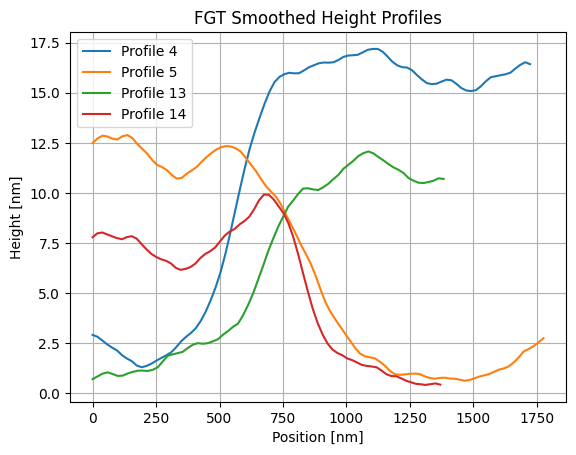

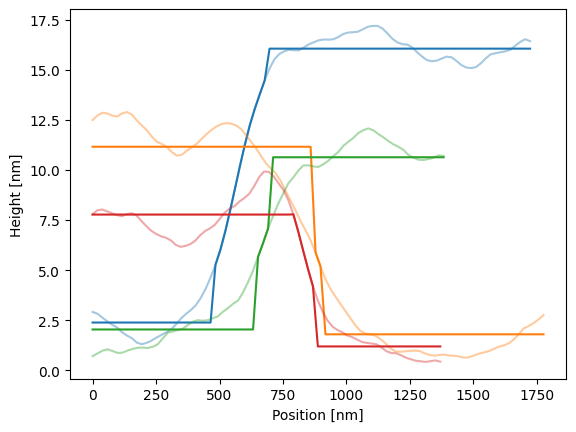

In [19]:
FGT_smooth.graph(show_steps=True)
FGT_threshold = FGT_smooth.threshold_averaging(0.6e-9)
FGT_threshold.graph(raw=FGT_smooth,grid=False,title=False,legend=False)

In [2]:
new_fgt_file = r"C:\Users\poeda\OneDrive\Desktop\Documents\Luo Group\AFM Images\CrsBr MTJ Project\MAXYMUS\MAXYMUS #4.013"
hBN_flake = afm.afmData(new_fgt_file, "FGT").zero_minimums().select_profiles([3])
# threshold = new_fgt.threshold_averaging(2e-9)
# threshold.graph(raw=new_fgt,grid=False,title=False,legend=False)
hBN_flake.plotly_graph()

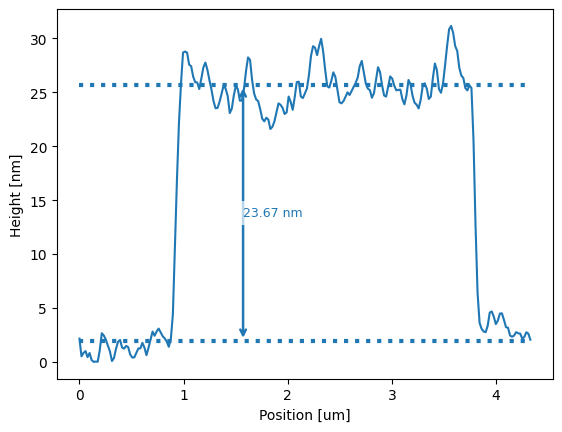

In [ ]:
plat1 = hBN_flake.data[
    ((hBN_flake.data['position3'] >= 0) & (hBN_flake.data['position3'] <= 850e-9)) |
    ((hBN_flake.data['position3'] >= 3900e-9) & (hBN_flake.data['position3'] <= 4300e-9))
]
plat2 = hBN_flake.data[
    (hBN_flake.data['position3'] >= 1000e-9) & (hBN_flake.data['position3'] <= 3700e-9)]
plat1_height = plat1['height3'].mean()
plat2_height = plat2['height3'].mean()
height = plat2_height - plat1_height
range = (0, plat1['position3'].max())
place = (plat1['position3'].mean())

hBN_flake.steps = { "Profile 3": {
    "step_height": height,
    "x_step": place,
    "plateau1_mean": plat1_height, 
    "plateau2_mean": plat2_height,
    "plateau1_range": range,
    "plateau2_range": range}}

hBN_flake.graph(show_steps=True, title=False, legend=False, grid=False)


In [3]:
fgt_flake_file = r"C:\Users\poeda\OneDrive\Desktop\Documents\Luo Group\AFM Images\CrsBr MTJ Project\MAXYMUS\MAXYMUS #4.013 clean.csv"
fgt_flake = afm.afmData(fgt_flake_file, "FGT Flake").zero_minimums().select_profiles([1,2,3,4,5])
hBN_flake = afm.afmData(fgt_flake_file, "hBN Flake").zero_minimums().select_profiles([6,7,8])
fgt_flake.plotly_graph()

In [16]:
plat1 = fgt_flake.data[
    ((fgt_flake.data['position1'] >= 0) & (fgt_flake.data['position1'] <= 350e-9)) |
    ((fgt_flake.data['position1'] >= 4500e-9) & (fgt_flake.data['position1'] <= 4800e-9))
]
plat2 = fgt_flake.data[
    (fgt_flake.data['position1'] >= 600e-9) & (fgt_flake.data['position1'] <= 4150e-9)]
plat1_height = plat1['height1'].mean()
plat2_height = plat2['height1'].mean()
height = plat2_height - plat1_height
range = (0, plat1['position1'].max())
place = 1000e-9

fgt_flake.steps = {}
fgt_flake.steps['Profile 1'] = {
    "step_height": height,
    "x_step": place,
    "plateau1_mean": plat1_height, 
    "plateau2_mean": plat2_height,
    "plateau1_range": range,
    "plateau2_range": range}


In [18]:
plat1 = fgt_flake.data[
    ((fgt_flake.data['position2'] >= 0) & (fgt_flake.data['position2'] <= 900e-9)) |
    ((fgt_flake.data['position2'] >= 5300e-9) & (fgt_flake.data['position2'] <= 6100e-9))
]
plat2 = fgt_flake.data[
    (fgt_flake.data['position2'] >= 1500e-9) & (fgt_flake.data['position2'] <= 5000e-9)]
plat1_height = plat1['height2'].mean()
plat2_height = plat2['height2'].mean()
height = plat2_height - plat1_height
range = (0, plat1['position2'].max())
place = 2000e-9

fgt_flake.steps['Profile 2'] =  {
    "step_height": height,
    "x_step": place,
    "plateau1_mean": plat1_height, 
    "plateau2_mean": plat2_height,
    "plateau1_range": range,
    "plateau2_range": range}


In [20]:
plat1 = fgt_flake.data[
    ((fgt_flake.data['position3'] >= 0) & (fgt_flake.data['position3'] <= 700e-9)) |
    ((fgt_flake.data['position3'] >= 5500e-9) & (fgt_flake.data['position3'] <= 6000e-9))
]
plat2 = fgt_flake.data[
    (fgt_flake.data['position3'] >= 1050e-9) & (fgt_flake.data['position3'] <= 5000e-9)]
plat1_height = plat1['height3'].mean()
plat2_height = plat2['height3'].mean()
height = plat2_height - plat1_height
range = (0, plat1['position3'].max())
place = 3000e-9

fgt_flake.steps['Profile 3'] = {
    "step_height": height,
    "x_step": place,
    "plateau1_mean": plat1_height, 
    "plateau2_mean": plat2_height,
    "plateau1_range": range,
    "plateau2_range": range}


In [21]:
plat1 = fgt_flake.data[
    ((fgt_flake.data['position4'] >= 0) & (fgt_flake.data['position4'] <= 700e-9)) |
    ((fgt_flake.data['position4'] >= 3600e-9) & (fgt_flake.data['position4'] <= 4200e-9))
]
plat2 = fgt_flake.data[
    (fgt_flake.data['position4'] >= 1000e-9) & (fgt_flake.data['position4'] <= 3350e-9)]
plat1_height = plat1['height4'].mean()
plat2_height = plat2['height4'].mean()
height = plat2_height - plat1_height
range = (0, plat1['position4'].max())
place = 4000e-9

fgt_flake.steps['Profile 4'] = {
    "step_height": height,
    "x_step": place,
    "plateau1_mean": plat1_height, 
    "plateau2_mean": plat2_height,
    "plateau1_range": range,
    "plateau2_range": range}


In [22]:
plat1 = fgt_flake.data[
    ((fgt_flake.data['position5'] >= 0) & (fgt_flake.data['position5'] <= 400e-9)) |
    ((fgt_flake.data['position5'] >= 4300e-9) & (fgt_flake.data['position5'] <= 4870e-9))
]
plat2 = fgt_flake.data[
    (fgt_flake.data['position5'] >= 650e-9) & (fgt_flake.data['position5'] <= 4000e-9)]
plat1_height = plat1['height5'].mean()
plat2_height = plat2['height5'].mean()
height = plat2_height - plat1_height
range = (0, plat1['position5'].max())
place = 5000e-9

fgt_flake.steps['Profile 5'] = {
    "step_height": height,
    "x_step": place,
    "plateau1_mean": plat1_height, 
    "plateau2_mean": plat2_height,
    "plateau1_range": range,
    "plateau2_range": range}


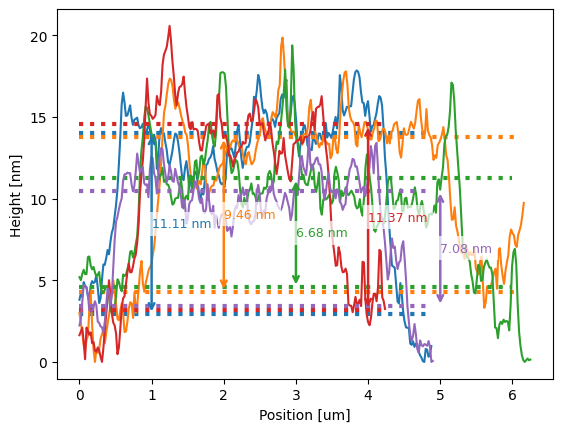

In [36]:
fgt_flake.graph(show_steps=True, title=False, legend=False, grid=False)

In [ ]:
hBN_flake.plotly_graph()

In [38]:
plat1 = hBN_flake.data[
    ((hBN_flake.data['position6'] >= 0) & (hBN_flake.data['position6'] <= 840e-9)) |
    ((hBN_flake.data['position6'] >= 3450e-9) & (hBN_flake.data['position6'] <= 4000e-9))
]
plat2 = hBN_flake.data[
    (hBN_flake.data['position6'] >= 1000e-9) & (hBN_flake.data['position6'] <= 3300e-9)]
plat1_height = plat1['height6'].mean()
plat2_height = plat2['height6'].mean()
height = plat2_height - plat1_height
range = (0, plat1['position6'].max())
place = 2500e-9

hBN_flake.steps = {}

hBN_flake.steps['Profile 6'] = {
    "step_height": height,
    "x_step": place,
    "plateau1_mean": plat1_height, 
    "plateau2_mean": plat2_height,
    "plateau1_range": range,
    "plateau2_range": range}


In [39]:
plat1 = hBN_flake.data[
    ((hBN_flake.data['position7'] >= 0) & (hBN_flake.data['position7'] <= 1300e-9)) |
    ((hBN_flake.data['position7'] >= 5400e-9) & (hBN_flake.data['position7'] <= 5800e-9))
]
plat2 = hBN_flake.data[
    (hBN_flake.data['position7'] >= 1500e-9) & (hBN_flake.data['position7'] <= 5200e-9)]
plat1_height = plat1['height7'].mean()
plat2_height = plat2['height7'].mean()
height = plat2_height - plat1_height
range = (0, plat1['position7'].max())
place = 3500e-9

hBN_flake.steps['Profile 7'] = {
    "step_height": height,
    "x_step": place,
    "plateau1_mean": plat1_height, 
    "plateau2_mean": plat2_height,
    "plateau1_range": range,
    "plateau2_range": range}


In [43]:
plat1 = hBN_flake.data[
    (hBN_flake.data['position8'] >= 4800) & (hBN_flake.data['position8'] <= 5470e-9)]
plat2 = hBN_flake.data[
    (hBN_flake.data['position8'] >= 200e-9) & (hBN_flake.data['position8'] <= 4500e-9)]
plat1_height = plat1['height8'].mean()
plat2_height = plat2['height8'].mean()
height = plat2_height - plat1_height
range = (0, plat1['position8'].max())
place = 4000e-9

hBN_flake.steps['Profile 8'] = {
    "step_height": height,
    "x_step": place,
    "plateau1_mean": plat1_height, 
    "plateau2_mean": plat2_height,
    "plateau1_range": range,
    "plateau2_range": range}


In [47]:
hBN_flake.graph(show_steps=True, title=False, legend=False, grid=False) 

StopIteration: 

<Figure size 640x480 with 1 Axes>

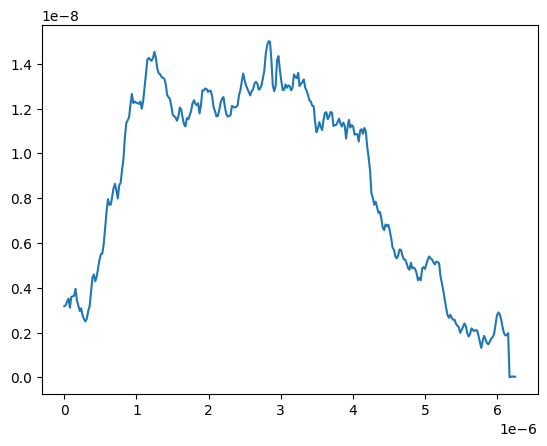

In [7]:
fgt_flake.average_profiles()
plt.plot(fgt_flake.data['mean_position'], fgt_flake.data['height_avg'])